##Interpolación lineal
1. Construir un programa que permita calcular una interpolación lineal, para ello debera realizar lo siguiente:
  
  a. Deducir el método de interpolación lineal y encontrar la ecuación general de recurrencia que permite interpolar.


la interpolación líneal, une dos puntos mediante una recta:

$y-y_0 = m(x-x_0)$

$m = \frac{y_1-y_0}{x1-x_0}$

$y-y_0 = \frac{y_1-y_0}{x1-x_0}(x-x_0)$

$y-y_0 = \frac{y_1-y_0}{x1-x_0}x- \frac{y_1-y_0}{x1-x_0}x_0$

$y = y_0 + \frac{y_1-y_0}{x1-x_0}x- \frac{y_1-y_0}{x1-x_0}x_0$

Este procedimiento se repite para cada par de puntos:

$y = y_n + \frac{y_{n+1} - y_n}{x_{n+1} - x_n}x- \frac{y_{n+1} - y_n}{x_{n+1} - x_n}x_n$



  
  
  b. Aplicar el método para dos puntos.
  
  c. Generalizar el método para N de puntos.

[{'m': 2.0, 'b': -3.0} {'m': 1.25, 'b': 0.75} {'m': 7.0, 'b': -51.0}
 {'m': -5.0, 'b': 129.0}]


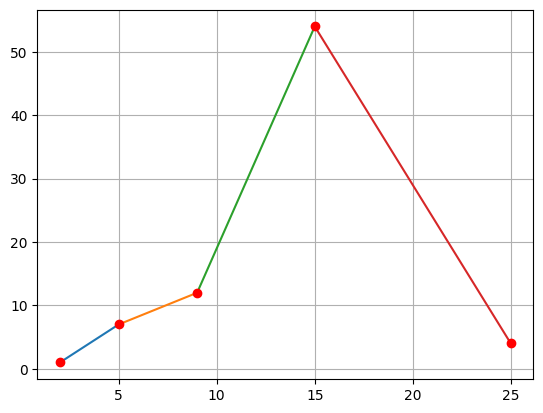

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def funcionLineal(x,params):
 xi=params[0]
 xi_1=params[1]
 yi=params[2]
 yi_1=params[3]
 m = ((yi - yi_1)/(xi- xi_1))
 b =   yi_1 -(((yi - yi_1)/(xi- xi_1))*xi_1)
 #fx = (((yi - yi_1)/(xi- xi_1))*x)  + yi_1 - (((yi - yi_1)/(xi- xi_1))*xi_1)
 fx = m*x + b
 return fx, {"m":m,"b":b}


def interpolacion(x,y, f):
  if len(x) != len(y):
    print("El tamaño del array de x y y deben ser iguales")
    return 0
  if ((np.sort(x) == x).all() == False):
    print("Los puntos (x,y) se deben enviar ordenados ascendentemente respecto a x")
    return 0
  plt.figure()
  estructura = np.array([])
  for i in range(1,len(x)):
    x_ = np.linspace(x[i-1], x[i],50)
    params = (x[i],x[i-1],y[i],y[i-1])
    y_, estruc = f(x_, params)
    estructura = np.append(estructura,estruc)
    plt.plot(x_,y_)
  plt.plot(x,y, "ro")
  plt.grid()
  return estructura

x_inicial = np.array([2,5,9,15,25])
y_inicial = np.array([1,7,12,54,4])
structure = interpolacion(x_inicial,y_inicial,funcionLineal)
print(structure)

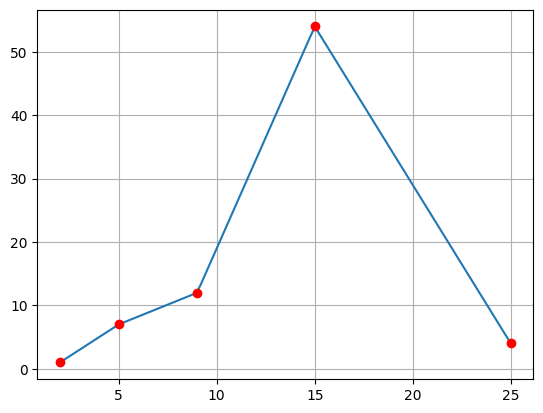

In [ ]:
from scipy import interpolate as inter
import numpy as np
import matplotlib.pylab as plt

x_inicial = np.array([2,5,9,15,25])
y_inicial = np.array([1,7,12,54,4])
inter = inter.interp1d(x_inicial, y_inicial, kind="linear")

x_ = np.linspace(x_inicial[0],x_inicial[len(x_inicial)-1],100)
y_ = inter(x_)
plt.figure()
plt.plot(x_,y_)
plt.plot(x_inicial,y_inicial, "ro")
plt.grid()


2. Determinar la interpolacion lineal que pasa por los puntos(2, 4), y (5, 1). Escribir la solución en código markdown.

Puntos:

$p_0= (x_0,y_0) = (2, 4)$;

 $p_1= (x_1,y_1) = (5, 1)$

La interpolación lineal es de la forma $y = mx + b$

$y-y_0 = \frac{y_1 - y_0}{x_1 - x_0}(x - x_0)$

$y-y_0 = \frac{y_1 - y_0}{x_1 - x_0}x - \frac{y_1 - y_0}{x_1 - x_0}x_0$

$y = \frac{y_1 - y_0}{x_1 - x_0}x + y_0 - \frac{y_1 - y_0}{x_1 - x_0}x_0$

$m = \frac{y_1 - y_0}{x_1 - x_0} = \frac{1 - 4}{5 - 2} = -\frac{3}{3} = -1$

$b = y_0 - \frac{y_1 - y_0}{x_1 - x_0}x_0 = 4 - 2\frac{1 - 4}{5 - 2} = 4-2(-\frac{3}{3}) = 4 + 2 = 6$

y = -x + 6

##Interpolación de Lagrange

La interpolación de Lagrange se basa en la construccón de un polinomio de grado 2, denominado el polinomio de lagrange P(x).

Por lo que dado 3 puntos $(x_0,y_0), (x_1,y_1), (x_2,y_2)$ este polinomio cumpre que $P(x_0) = y_0$, es decir $P(x_i) = y_i$, para cada punto a interpolar.

$P(x) = f(x_0)L_0 +  f(x_1)L_1 + f(x_2)L_2$

$P(x) = f(x_0)L_0(x) +  f(x_1)L_1(x) + f(x_2)L_2(x)$

$L_0(x)$ debe ser de tal forma que $f(x_0)L_0(x)$ se igual a 0 si $x != x_0$ y $y_0$ si $x = x_0$ y así para todo $L_i$, por lo que $L_0$ debe ser de la forma:

$$L_0(x) = \frac{(x-x_1)}{(x_0-x_1)} \frac{(x-x_2)}{(x_0-x_2)} $$

$$L_1(x) = \frac{(x-x_0)}{(x_1-x_0)} \frac{(x-x_2)}{(x_1-x_2)} $$

$$L_2(x) = \frac{(x-x_0)}{(x_2-x_0)} \frac{(x-x_1)}{(x_2-x_1)} $$


por lo que para 3 puntos el polinomio quedaría de la siguiente forma:

$$P(x) = f(x_0)\frac{(x-x_1)}{(x_0-x_1)} \frac{(x-x_2)}{(x_0-x_2)} +  f(x_1)\frac{(x-x_0)}{(x_1-x_0)} \frac{(x-x_2)}{(x_1-x_2)} + f(x_2)\frac{(x-x_0)}{(x_2-x_0)} \frac{(x-x_1)}{(x_2-x_1)}$$

por lo que de manera general para $n$ puntos $L_i$ se expresa de la forma:

\begin{equation}
L_{j}(x) = ∏_{i = 0, i \neq j}^{n-1}\frac{x-x_{i}}{x_{j}-x_{i}}
\end{equation}

y el polinomio de Lagrange se expresa de la forma:
\begin{equation}
P(x) = \sum_{i = 0}^{n} f(x_{i})L_{i}(x)
\end{equation}







3. Disenar un programa general, que realice la interpolación de lagrange según lo visto en clase.

x**2/2 - 9*x/2 + 11

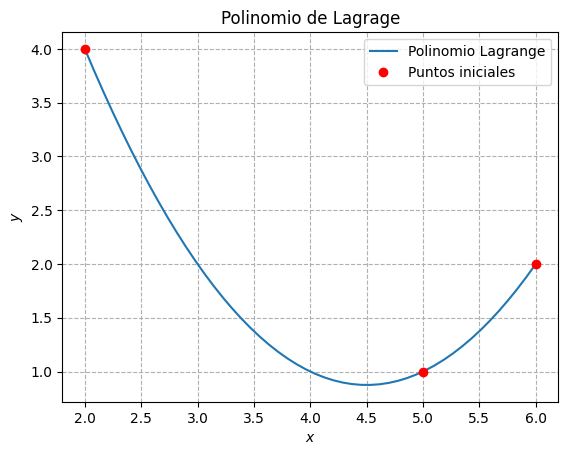

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def Lj(j,x_arr,x):
  l = 1
  for i in np.arange(0,len(x_arr)):
    if(i != j):
      l *= ((x-x_arr[i])/(x_arr[j]-x_arr[i]))
  return l

def lagrange(x_arr,y_arr):
  if( len(x_arr) != len(y_arr)):
    print("El array de 'x' y 'y' deben tener la misma dimensión")
    return False
  p = 0
  x = sp.Symbol("x")
  for j in np.arange(0,len(x_arr)):
    p += y_arr[j]* Lj(j,x_arr,x)
  p = sp.simplify(p)
  fun = sp.lambdify(x,p,'numpy')
  return p, fun

def graficarPolinomioLagrange(x_arr,y_arr):
  if( len(x_arr) != len(y_arr)):
    print("El array de 'x' y 'y' deben tener la misma dimensión")
    return False
  p, px  = lagrange(x_arr,y_arr)
  ##p = p.expand()
  x_pol = np.linspace(x_arr[0],x_arr[len(x_arr)-1],50)
  y_pol = px(x_pol)
  plt.plot(x_pol,y_pol, label="Polinomio Lagrange")
  plt.plot(x_arr,y_arr,"ro", label="Puntos iniciales")
  plt.title("Polinomio de Lagrage")
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.grid(linestyle="--")
  plt.legend()
  return p,px

x_arr = np.array([2,5,6])
y_arr = np.array([4,1,2])
p,px = graficarPolinomioLagrange(x_arr,y_arr)
p

Consideremos la función: \begin{equation*} f(x) = \frac{1}{1+25x^2} \end{equation*} en el intervalo [-1,1], definamos un conjunto de puntos $n +1$ equiespaciados en [-1,1].

1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n = 4, 8, 12, 16, 20$.

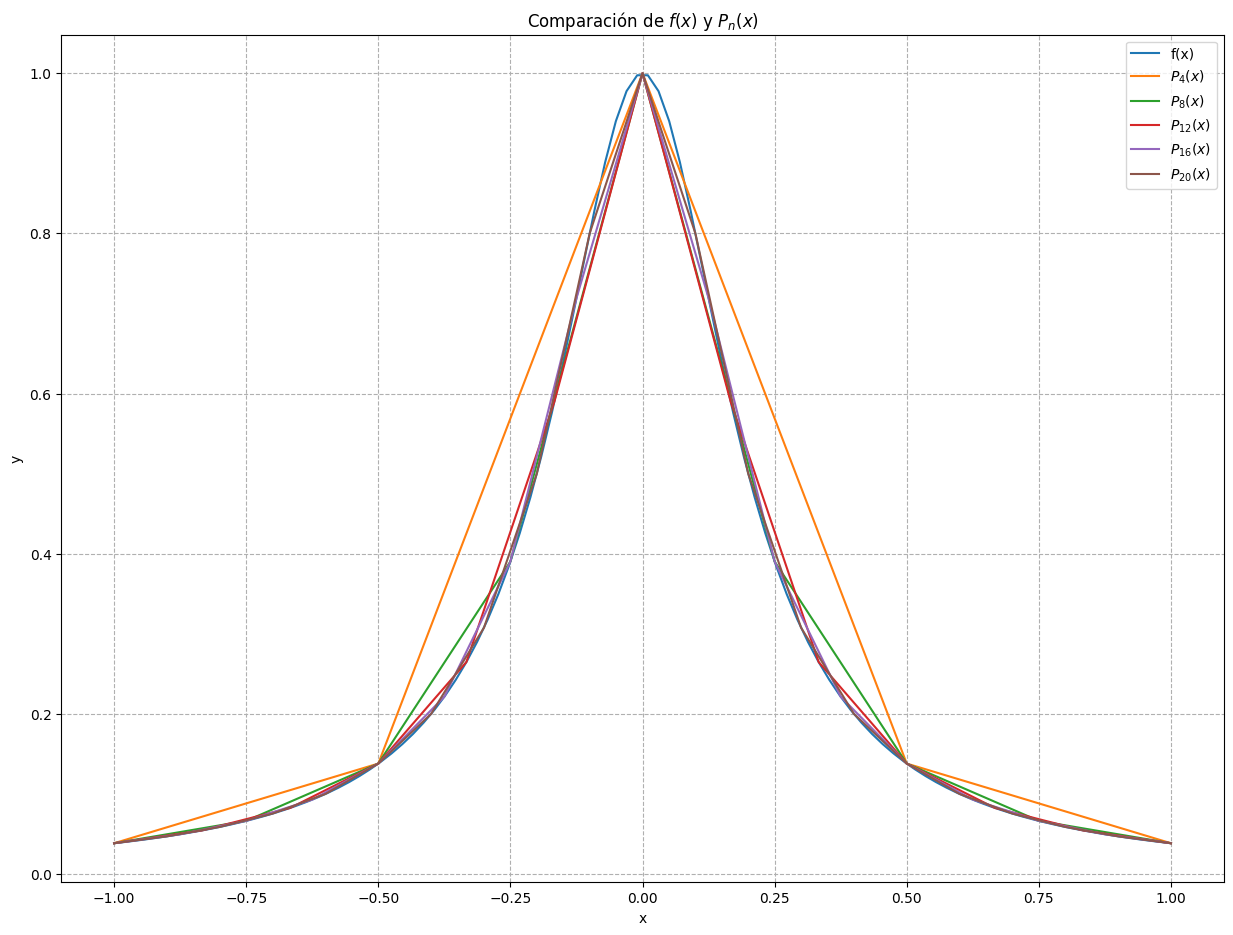

In [ ]:
import numpy as np

f = lambda x: 1/(1 + (25*(x**2)))
n_ = np.array([4, 8, 12, 16, 20])
x = np.linspace(-1,1,100)
y = f(x)
plt.figure(figsize=(15,11))
plt.title("Comparación de $f(x)$ y $P_n(x)$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x,y, label="f(x)")
for i, n in enumerate(n_):
  x_ = np.linspace(-1,1,n+1)
  y_ = f(x_)
  p, fpol = lagrange(x_,y_)
  py = fpol(x_)
  plt.plot(x_,py, label="$P_{"+str(n)+"}(x)$")
  plt.legend()
  plt.grid(linestyle="--")




2.Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

Para este numeral, emplee que:

La cota del error , viene dado por: \begin{equation} f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n) \end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [ ]:
n_= 4

x = sp.Symbol("x")
n = sp.Symbol("n")
xi = sp.Symbol("xi")
fs = 1/(1+(25*x**2))
f_n = sp.diff(f(x), x, n_+1) #derivada n+1
f_n

3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4

In [ ]:
e = (1/sp.factorial(n+1))*f_n*(x-x_[0])*(x-x_[1])*(x-x_[2])*(x-x_[3])*(x-x_[4])
e

3750000*x**2*(x - 1.0)*(x - 0.5)*(x + 0.5)*(x + 1.0)*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/((25*x**2 + 1)**4*factorial(n + 1))

In [ ]:
x_i = 0.5
a = -1
b = 1

def dibujarLagrange(a,b,x_i,n,f):
  y_i = f(x_i)
  #puntos para el polinomio de Lagrange
  x_ = np.linspace(a,b,n+1)
  y_ = f(x_)
  #puntos para dibujar la función
  x_f = np.linspace(a,b,1000)
  y_f = f(x_f)
  #polinomio de Lagrange
  p, pol = lagrange(x_,y_)
  y_p = pol(x_f)

  err = y_f - y_p
  titulo = "Comparación de $f(x)$ y $P_" + str(n) +"(x)$"
  plt.title(titulo)
  plt.ylabel("y")
  plt.xlabel("x")
  plt.plot(x_f,y_f,ms=5,label="$f(x)$")
  plt.plot(x_i,y_i, "ro",label="$f(0.5)$")
  plt.plot(x_,y_,"b.",label="Puntos a interpolar")
  lab = "$P_"+str(n)+"(x)$"
  plt.plot(x_f,y_p, label=lab)
  plt.plot(x_f,err, ls="--", label="$\epsilon = f(x) - P(x)$")
  plt.grid(linestyle="--")
  plt.legend()

**Como se observará en los gráficos, a medida que aumenta n, el error va creciendo, haciéndoce más grande en los puntos extremos del intervalo.**

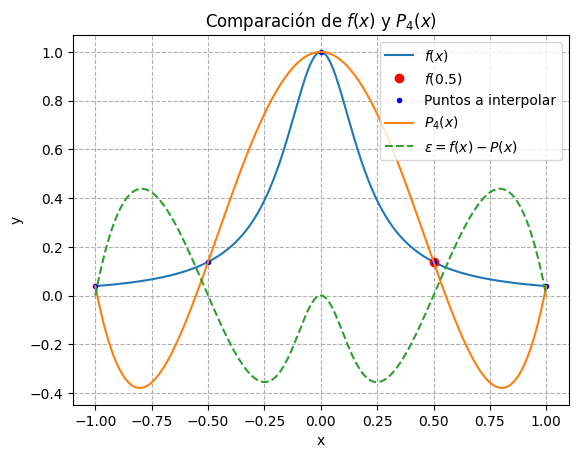

In [ ]:
dibujarLagrange(a,b,x_i,4,f)

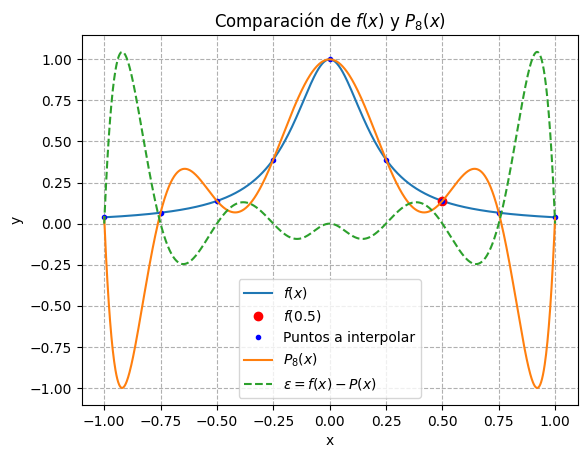

In [ ]:
dibujarLagrange(a,b,x_i,8,f)

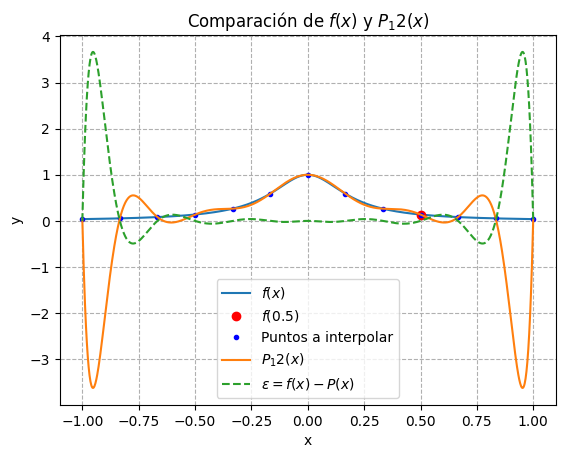

In [ ]:
dibujarLagrange(a,b,x_i,12,f)

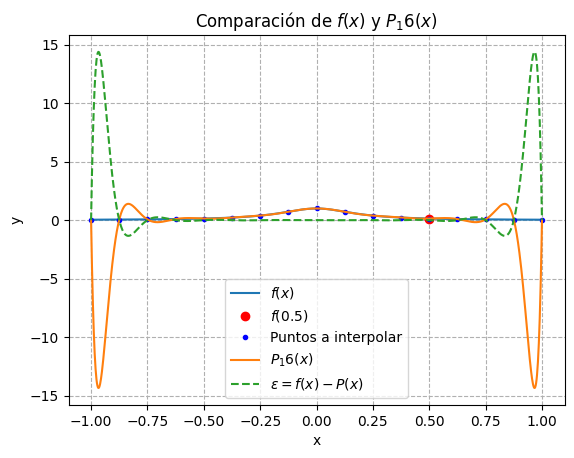

In [ ]:
dibujarLagrange(a,b,x_i,16,f)

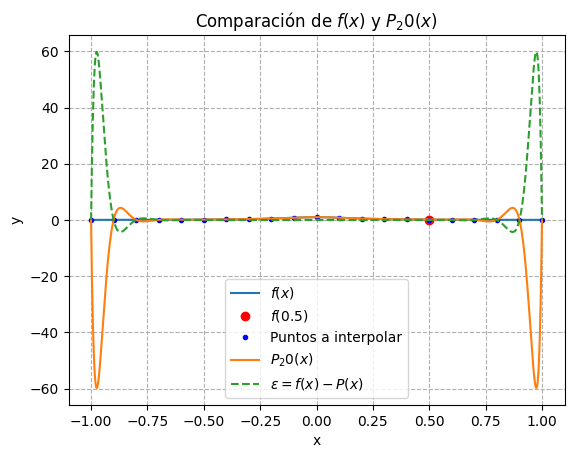

In [ ]:
dibujarLagrange(a,b,x_i,20,f)